# Importing Libraries

In [1]:
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer
import numpy as np
import pandas as pd
import regex as re
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import plotly.express as px
import plotly.graph_objects as goa
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.preprocessing import OrdinalEncoder
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# Test Data Preprocessing

In [2]:
df = pd.read_csv("twitter_validation.csv")

In [3]:
# Label the columns
df.columns = ["tweet_id","place", "sentiments", "tweets"]
df = df.drop("place", axis=1)
df

,tweet_id,sentiments,tweets
0,352,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Neutral,Now the President is slapping Americans in the...
4,6273,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...
994,4891,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Positive,Bought a fraction of Microsoft today. Small wins.


# Data Cleaning and Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    999 non-null    int64 
 1   sentiments  999 non-null    object
 2   tweets      999 non-null    object
dtypes: int64(1), object(2)
memory usage: 23.5+ KB


In [5]:
# Identify inconsistencies
#The code `duplicate_rows = df[df.duplicated()]` is identifying and storing the duplicate rows in the DataFrame `df`. The `df.duplicated()` function returns a boolean Series indicating whether each row is a duplicate or not. By passing this boolean Series as a filter to the DataFrame `df`, only the duplicate rows are selected and stored in the variable `duplicate_rows`.
duplicate_rows = df[df.duplicated()]
duplicate_rows

,tweet_id,sentiments,tweets


In [6]:
# Identify missing values
#The code is calculating the number of missing values in each column of the DataFrame `df`. It uses the `isna()` method to check for missing values and the `sum()` method to calculate the total number of missing values in each column. The result is stored in the variable `missing_values`.
missing_values = df.isna().sum()
missing_values

tweet_id      0
sentiments    0
tweets        0
dtype: int64

In [7]:
# removing duplicates

df.drop_duplicates(inplace = True)

# Remove the duplicate rows
df = df.drop_duplicates()

df['tweets'] = df['tweets'].astype(str)



stopw = set(stopwords.words("english"))

print(stopw)
df["tweets"] = df['tweets'].apply(lambda x: ' '.join(
    [word.lower() for word in x.split() if word.lower() not in stopw]))


def convert_list_to_str(l):
    st = ""
    for i in l:
        st = st+i+" "
    st = st[:-1]
    return st


tokenizer = RegexpTokenizer(r'\w+|\d+')
df["tweets_new"] = df["tweets"].apply(tokenizer.tokenize)
df["tweets_new"] = df["tweets_new"].apply(convert_list_to_str)


df

{'them', 'more', 'should', 'whom', 'that', 'an', 'how', "you're", 'being', 'against', 'hers', "didn't", 'but', 'his', 're', 'isn', 'ma', 'too', "needn't", 'my', 'will', 'again', 'all', 'yourselves', "hasn't", 'further', 'haven', "you'd", 'yourself', 'hadn', 'up', 'before', 'himself', 'won', "you've", 'out', "mustn't", 'to', 'was', 'just', 'own', 'couldn', "shan't", 'where', 'if', 'this', 'it', 'you', 've', 'we', "weren't", 'has', "don't", 'into', 'not', 'as', 'll', "isn't", 'they', 'between', 'few', 'her', "couldn't", 'had', 'ours', 'your', 'which', "she's", 'doing', 'so', 'd', 'mustn', "won't", 'other', 'shouldn', 'for', 'with', 'until', 'down', 'during', "wasn't", 'he', 'having', 'm', 'are', 'some', 'him', 'wouldn', 'than', 'did', 'itself', 'aren', 'only', 'a', "hadn't", 'on', 'been', 'the', 'mightn', 'once', 't', 'these', "shouldn't", 'very', 'of', 'at', 'off', 'about', 'y', 'didn', 'yours', 'is', 'then', 'needn', "it's", 'o', 'what', "that'll", 'weren', 'why', 'our', 'have', 'thems

,tweet_id,sentiments,tweets,tweets_new
0,352,Neutral,bbc news - amazon boss jeff bezos rejects clai...,bbc news amazon boss jeff bezos rejects claims...
1,8312,Negative,@microsoft pay word functions poorly @samsungu...,microsoft pay word functions poorly samsungus ...
2,4371,Negative,"csgo matchmaking full closet hacking, truly aw...",csgo matchmaking full closet hacking truly awf...
3,4433,Neutral,president slapping americans face really commi...,president slapping americans face really commi...
4,6273,Negative,hi @eahelp i’ve madeleine mccann cellar past 1...,hi eahelp i ve madeleine mccann cellar past 13...
...,...,...,...,...
994,4891,Irrelevant,"⭐️ toronto arts culture capital canada, it’s w...",toronto arts culture capital canada it s wonde...
995,4359,Irrelevant,actually good move tot bring viewers. one peop...,actually good move tot bring viewers one peopl...
996,2652,Positive,today sucked it’s time drink wine n play borde...,today sucked it s time drink wine n play borde...
997,8069,Positive,bought fraction microsoft today. small wins.,bought fraction microsoft today small wins


In [8]:

lemmatizer = WordNetLemmatizer()


def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if no mapping found


def lemmatize_sentence(sentence):
    # tokenizer = RegexpTokenizer(r'\w+')
    # words = word_tokenize(sentence)
    words = sentence.split()
    pos_tags = nltk.pos_tag(words)
    lemmatizer = WordNetLemmatizer()

    lemmatized_words = [lemmatizer.lemmatize(
        word, get_wordnet_pos(pos_tag)) for word, pos_tag in pos_tags]
    return ' '.join(lemmatized_words)


def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df["tweets_new"] = df["tweets_new"].apply(lemmatize_sentence)
print(df)

df["tweets"] = df["tweets_new"]

# df["tweets"] = df["tweets_new"].apply(convert_list_to_str)
df = df.drop(columns=["tweets_new"])
# print(df)

#fill 0 in mum
df['tweets'] = df['tweets'].fillna(0)

# Save the dataframe
df.to_csv("tweet_clean.csv", index=False)
df


     tweet_id  sentiments                                             tweets  \
0         352     Neutral  bbc news - amazon boss jeff bezos rejects clai...   
1        8312    Negative  @microsoft pay word functions poorly @samsungu...   
2        4371    Negative  csgo matchmaking full closet hacking, truly aw...   
3        4433     Neutral  president slapping americans face really commi...   
4        6273    Negative  hi @eahelp i’ve madeleine mccann cellar past 1...   
..        ...         ...                                                ...   
994      4891  Irrelevant  ⭐️ toronto arts culture capital canada, it’s w...   
995      4359  Irrelevant  actually good move tot bring viewers. one peop...   
996      2652    Positive  today sucked it’s time drink wine n play borde...   
997      8069    Positive       bought fraction microsoft today. small wins.   
998      6960     Neutral  johnson & johnson stop selling talc baby powde...   

                                       

,tweet_id,sentiments,tweets
0,352,Neutral,bbc news amazon bos jeff bezos reject claim co...
1,8312,Negative,microsoft pay word function poorly samsungus c...
2,4371,Negative,csgo matchmaking full closet hack truly awful ...
3,4433,Neutral,president slap american face really commit unl...
4,6273,Negative,hi eahelp i ve madeleine mccann cellar past 13...
...,...,...,...
994,4891,Irrelevant,toronto art culture capital canada it s wonder...
995,4359,Irrelevant,actually good move tot bring viewer one people...
996,2652,Positive,today suck it s time drink wine n play borderl...
997,8069,Positive,buy fraction microsoft today small win


In [9]:
#check for duplicates
df.duplicated().sum()

0

In [10]:
#check null
df['tweets'].isnull().sum()

0

# Exploratory data analysis (EDA)

In [11]:
#`df.describe().T` is transposing the output of the `describe()` method on a DataFrame `df`. The `describe()` method provides summary statistics of the numerical columns in the DataFrame, such as count, mean, standard deviation, minimum, maximum, and quartiles. By applying `.T` after `describe()`, the output is transposed, meaning the rows become columns and vice versa. This can be useful for better readability or for further analysis of the summary statistics.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,999.0,6435.159159,3728.912226,6.0,3241.5,6560.0,9662.5,13197.0


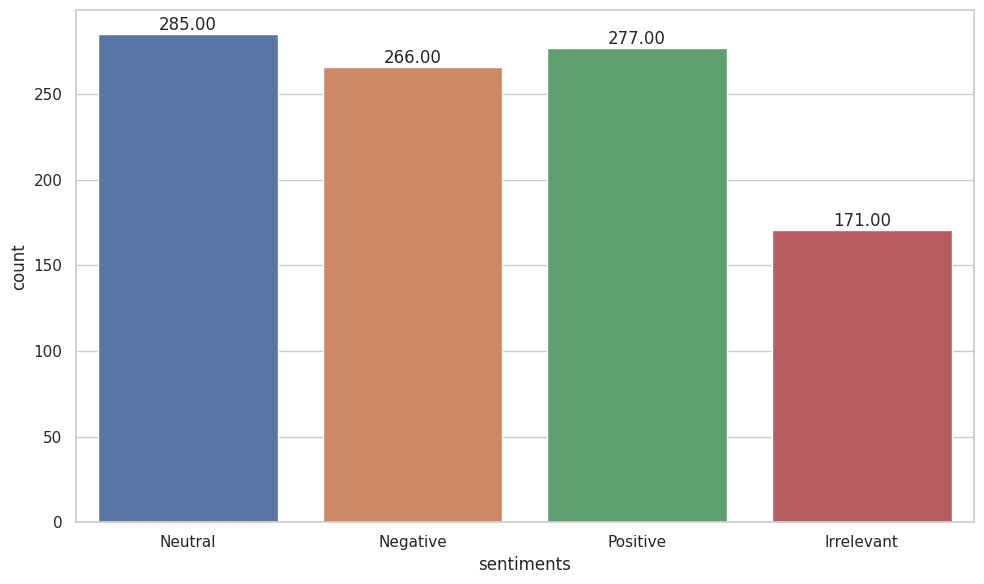

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiments', data=df)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')
plt.tight_layout()
plt.show()


In [13]:


df_copy = df.copy()

ordinal_encoder = OrdinalEncoder()

# Every single column with categorical values will be converted.
object_cols = ['sentiments']
df_copy[object_cols] = df_copy[object_cols].astype(str)

df_copy[object_cols] = ordinal_encoder.fit_transform(df_copy[object_cols])

df_copy.head()

ordinal_encoder = OrdinalEncoder()

# Every single column with categorical values will be converted.
object_cols = ['tweet_id', 'sentiments', 'tweets']
df[object_cols] = df[object_cols].astype(str)

df[object_cols] = ordinal_encoder.fit_transform(df[object_cols])

df.head()


,tweet_id,sentiments,tweets
0,434.0,2.0,90.0
1,854.0,1.0,580.0
2,505.0,1.0,177.0
3,511.0,2.0,708.0
4,660.0,1.0,407.0


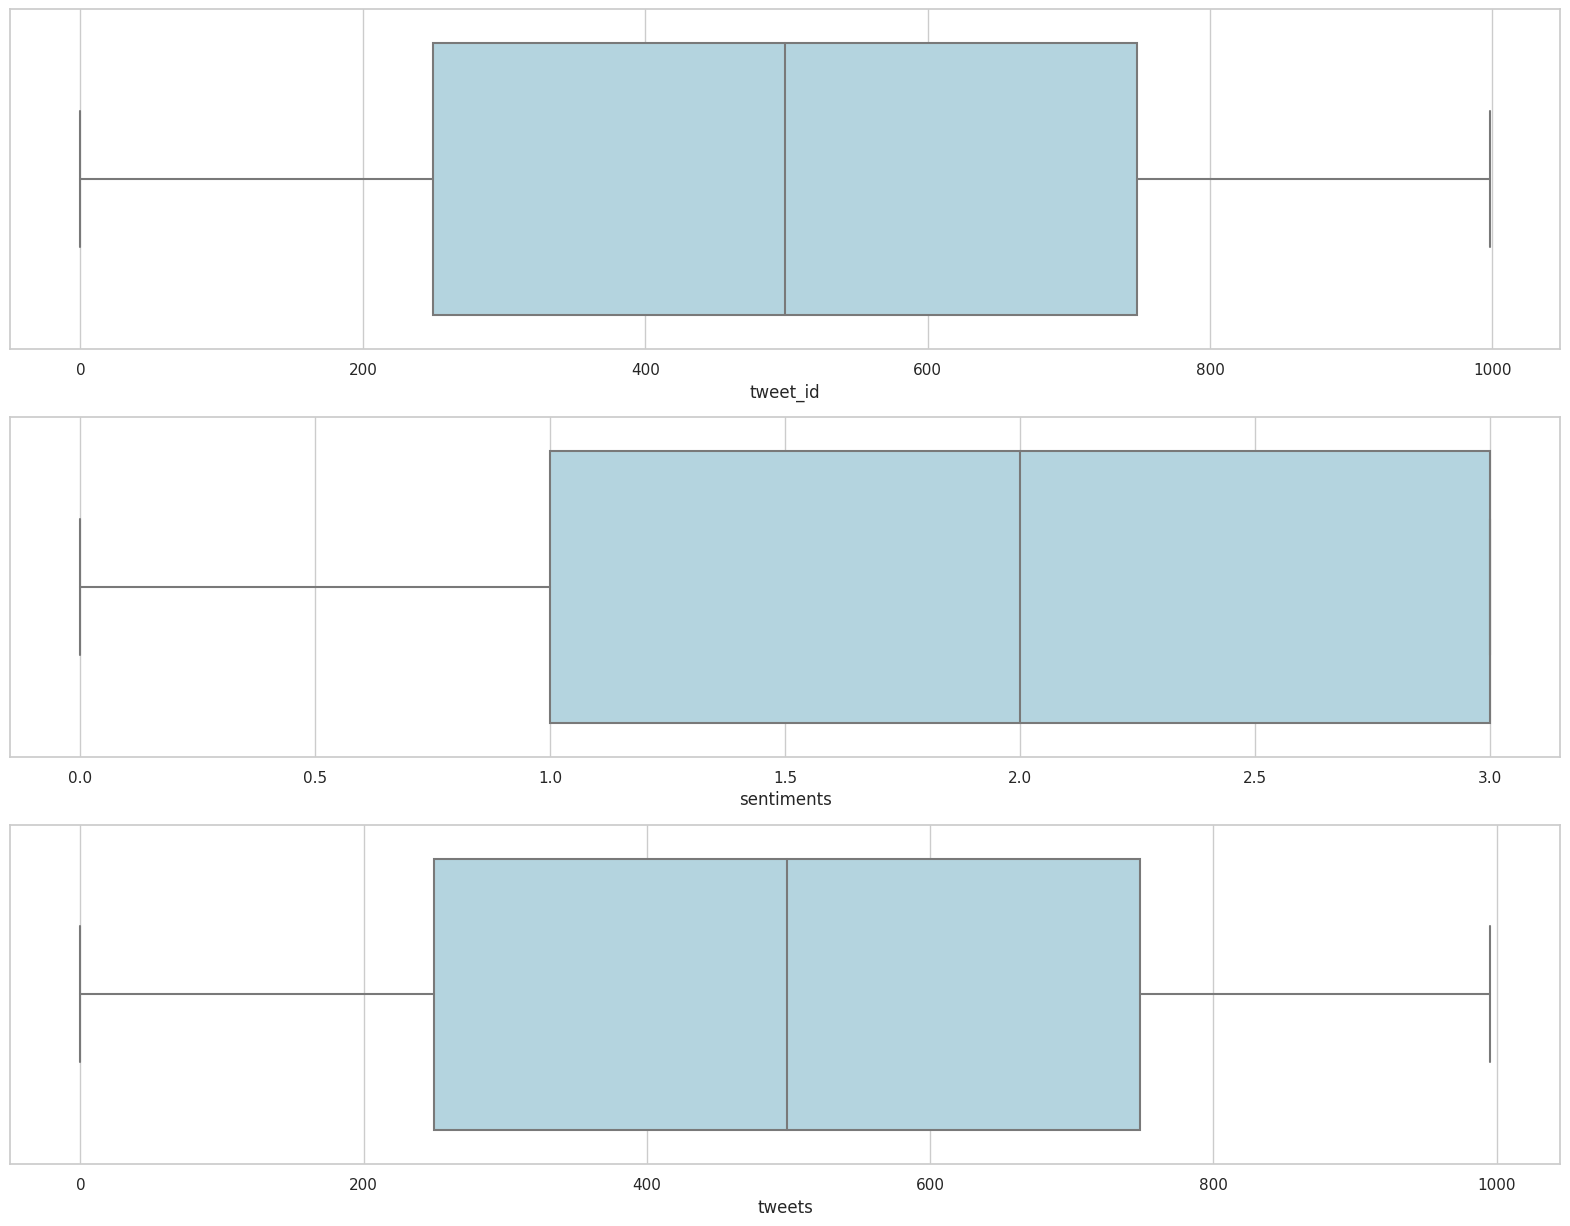

In [14]:

plt.figure(figsize= (20,15))

plt.subplot(3,1,1)
sns.boxplot(x= df['tweet_id'], color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= df['sentiments'], color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= df['tweets'], color='lightblue')

plt.show()


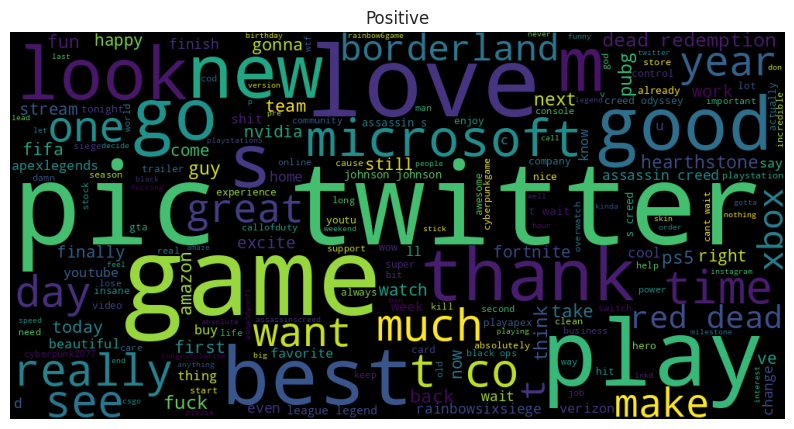

In [15]:


# Load the cleaned data
clean_df = pd.read_csv("tweet_clean.csv")

# Extract the sentiment words
positive_words = clean_df[clean_df['sentiments'] == 'Positive']['tweets'].tolist()
positive_words = [str(word) for word in positive_words]
positive_wordcloud = WordCloud(width=1000, height=500).generate(' '.join(positive_words))

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(positive_wordcloud)
plt.axis('off')
plt.title('Positive')
plt.show()


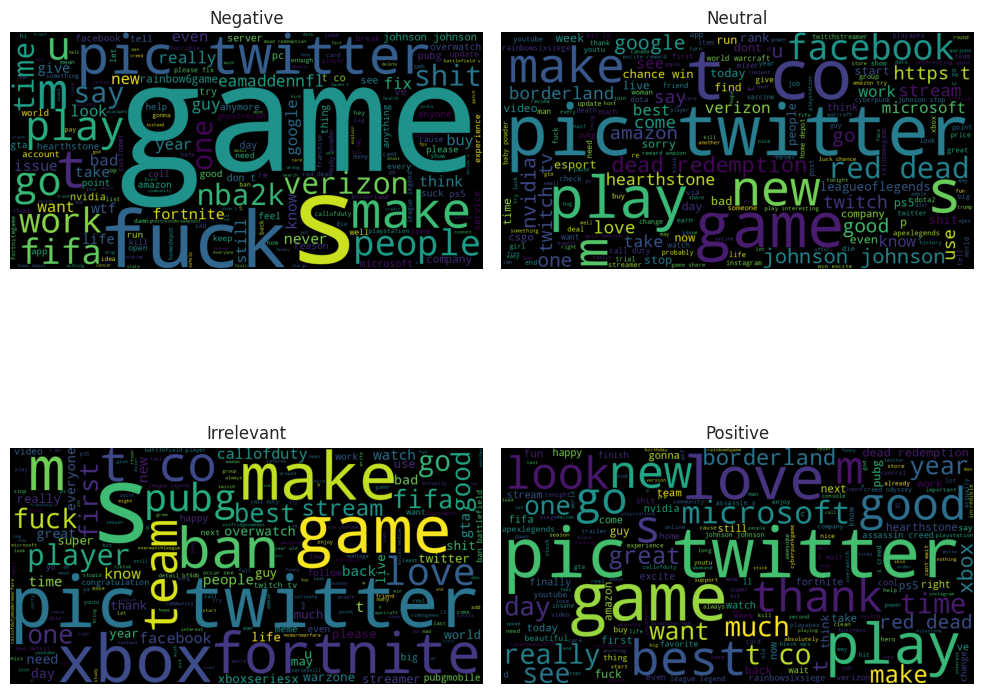

In [16]:
# Extract the sentiment words

negative_words = clean_df[clean_df['sentiments'] == 'Negative']['tweets'].tolist()
neutral_words = clean_df[clean_df['sentiments'] == 'Neutral']['tweets'].tolist()
irrelevant_words = clean_df[clean_df['sentiments'] == 'Irrelevant']['tweets'].tolist()

negative_words = [str(word) for word in negative_words]
neutral_words = [str(word) for word in neutral_words]
irrelevant_words = [str(word) for word in irrelevant_words]


negative_wordcloud = WordCloud(width=1000, height=500).generate(' '.join(negative_words))
neutral_wordcloud = WordCloud(width=1000, height=500).generate(' '.join(neutral_words))
irrelevant_wordcloud = WordCloud(width=1000, height=500).generate(' '.join(irrelevant_words))

# Display the word clouds
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(negative_wordcloud)
plt.axis('off')
plt.title('Negative')

plt.subplot(2, 2, 2)
plt.imshow(neutral_wordcloud)
plt.axis('off')
plt.title('Neutral')

plt.subplot(2, 2, 3)
plt.imshow(irrelevant_wordcloud)
plt.axis('off')
plt.title('Irrelevant')

plt.subplot(2, 2, 4)
plt.imshow(positive_wordcloud)
plt.axis('off')
plt.title('Positive')

plt.tight_layout()
plt.show()


In [17]:

fig = px.histogram(df, x='tweets', title='Tweets Distribution', barmode='group',
                   color_discrete_sequence=['blue'])  # Set the color to blue
fig.show()

In [18]:
print(df['sentiments'].nunique())

4


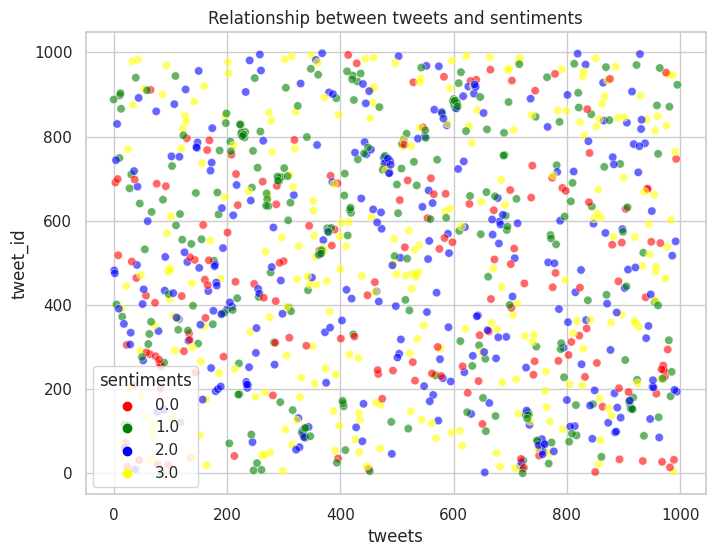

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.tweets, y=df.tweet_id,hue=df.sentiments,palette= ['red','green','blue', 'yellow'] ,alpha=0.6)
plt.title("Relationship between tweets and sentiments")
plt.show()

# Transformers and Pytorch Models

In [20]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 31.7 MB/s eta 0:00:00


In [25]:
import re
import numpy as np
# import emoji as emoji
import string
import pandas as pd
from transformers import BertTokenizer

In [26]:
def data_process(data, labels):
    input_ids = []
    attention_masks = []
    bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    for sentence in data:
        bert_inp = bert_tokenizer.__call__(sentence, max_length=36,
                                           padding='max_length', pad_to_max_length=True,
                                           truncation=True, return_token_type_ids=False)

        input_ids.append(bert_inp['input_ids'])
        attention_masks.append(bert_inp['attention_mask'])
    input_ids = np.asarray(input_ids)
    attention_masks = np.array(attention_masks)
    labels = np.array(labels)
    return input_ids, attention_masks, labels



In [27]:
# return input_ids, attention_masks, labels
input_ids, attention_masks, labels = data_process(df_copy["tweets"], df_copy["sentiments"])


input_ids.shape

(999, 36)

# Model Definations

In [28]:
import gc

import torch
from torch import nn
from transformers import BertModel

class BERT_CNN(nn.Module):

    def __init__(self, num_classes):
        super(BERT_CNN, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.conv = nn.Conv2d(in_channels=1, out_channels=13, kernel_size=(3, 768), padding=(1, 0))
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=(3, 1), stride=1)
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(442, num_classes)  # Adjust the output size to match the number of classes
        self.flat = nn.Flatten()
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, sent_id, mask):
        cls_hs = self.bert(input_ids=sent_id, attention_mask=mask, return_dict=False, output_hidden_states=True)
        x = cls_hs[0].unsqueeze(1)  # Add a channel dimension
        x = self.conv(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.flat(x)
        x = self.fc(x)
        return self.softmax(x)

class BERT_LSTM(nn.Module):

    def __init__(self, num_classes, hidden_size, num_layers, bidirectional):
        super(BERT_LSTM, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.lstm = nn.LSTM(input_size=768, hidden_size=hidden_size, num_layers=num_layers, batch_first=True, bidirectional=bidirectional)
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(hidden_size * 2 if bidirectional else hidden_size, num_classes)  # Adjust the output size to match the number of classes
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, sent_id, mask):
        cls_hs = self.bert(input_ids=sent_id, attention_mask=mask, return_dict=False, output_hidden_states=True)
        x = cls_hs[0]
        x = self.dropout(x)
        lstm_out, _ = self.lstm(x)
        x = self.fc(lstm_out[:, -1, :])  # Use the final hidden state for classification
        return self.softmax(x)


In [29]:
input_ids.shape

(999, 36)

In [30]:
# df = pd.DataFrame(list(zip(input_ids, attention_masks)), columns=['input_ids', 'attention_masks'])
dataset = pd.DataFrame({'input_ids': list(input_ids), 'attention_masks': list(attention_masks)}, columns=['input_ids', 'attention_masks'])
dataset

,input_ids,attention_masks
0,"[101, 4035, 2739, 9733, 8945, 2015, 5076, 2022...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,"[101, 7513, 3477, 2773, 3853, 9996, 19102, 227...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ..."
2,"[101, 20116, 3995, 2674, 12614, 2440, 9346, 20...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ..."
3,"[101, 2343, 14308, 2137, 2227, 2428, 10797, 22...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,"[101, 7632, 19413, 16001, 2361, 1045, 2310, 19...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...
994,"[101, 4361, 2396, 3226, 3007, 2710, 2009, 1055...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
995,"[101, 2941, 2204, 2693, 2000, 2102, 3288, 1397...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
996,"[101, 2651, 11891, 2009, 1055, 2051, 4392, 451...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
997,"[101, 4965, 12884, 7513, 2651, 2235, 2663, 102...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ..."


In [31]:
dataset.columns

Index(['input_ids', 'attention_masks'], dtype='object')

In [32]:
labels = labels.astype(np.int64)
labels

array([2, 1, 1, 2, 1, 3, 3, 3, 1, 3, 3, 1, 2, 1, 3, 3, 1, 3, 1, 1, 2, 0,
       1, 2, 2, 1, 0, 0, 1, 3, 3, 1, 3, 1, 2, 2, 0, 3, 2, 3, 2, 2, 2, 3,
       2, 1, 1, 1, 2, 3, 1, 1, 3, 3, 3, 3, 3, 1, 0, 1, 3, 3, 0, 1, 2, 1,
       0, 2, 1, 3, 1, 1, 3, 3, 0, 3, 0, 2, 2, 2, 3, 3, 2, 3, 2, 1, 0, 1,
       2, 2, 1, 3, 0, 0, 1, 1, 1, 2, 3, 2, 1, 3, 3, 2, 3, 2, 3, 1, 2, 2,
       2, 1, 2, 1, 2, 2, 3, 3, 2, 1, 1, 3, 1, 2, 1, 3, 2, 1, 2, 0, 3, 2,
       3, 3, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 3, 2, 3, 0, 3, 1, 2, 2, 2,
       0, 2, 1, 2, 3, 1, 2, 1, 0, 0, 0, 2, 1, 1, 1, 3, 3, 3, 2, 2, 3, 0,
       2, 2, 2, 3, 2, 1, 1, 2, 3, 3, 0, 0, 2, 3, 3, 2, 0, 2, 1, 1, 1, 1,
       3, 2, 2, 3, 3, 3, 3, 1, 3, 3, 0, 2, 0, 1, 1, 0, 0, 1, 3, 3, 1, 0,
       1, 3, 3, 1, 0, 0, 3, 3, 1, 3, 0, 2, 0, 0, 1, 2, 2, 3, 1, 0, 0, 3,
       3, 0, 0, 2, 3, 1, 1, 3, 3, 3, 3, 2, 2, 3, 1, 2, 3, 2, 1, 2, 2, 1,
       3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 2, 1, 3, 3, 1, 1, 1, 3, 1, 2, 3, 2,
       2, 1, 3, 1, 3, 1, 0, 2, 2, 3, 1, 2, 1, 0, 3,

In [33]:
(labels.astype(np.int64)).dtype

dtype('int64')

# BERT CNN MODEL

In [36]:
import gc
#import os
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from transformers import AutoModel
import pandas as pd



test_text = dataset
test_labels = labels


# del temp_text
gc.collect()
torch.cuda.empty_cache()

# train_count = len(train_labels)
test_count = len(test_labels)
# val_count = len(val_labels)

# import BERT-base pre-trained model
bert = AutoModel.from_pretrained('bert-base-uncased')

# for test set
test_seq = torch.tensor(test_text['input_ids'].tolist())
test_mask = torch.tensor(test_text['attention_masks'].tolist())
test_y = torch.tensor(test_labels.tolist())

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Create DataLoaders ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# define a batch size
batch_size = 32

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Freeze BERT Parameters ~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# pass the pre-trained BERT to our define architecture
model = BERT_CNN(num_classes=4)
model_state = torch.load("/content/bert_cnn_model.pth")
model.load_state_dict(model_state)
# model = BERT_LSTM(num_classes=4, hidden_size=128, num_layers=2, bidirectional=True)
# push the model to GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)

# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)


# loss function
#cross_entropy = nn.NLLLoss(weight=weights)
cross_entropy = nn.CrossEntropyLoss()

nnloss = nn.NLLLoss()

# set initial loss to infinite
best_valid_loss = float('inf')



def get_accuracy_per_batch(oglabels, predlabels):
  count = 0
  for i in range(len(oglabels)):
    if oglabels[i] == predlabels[i]:
      count+=1

  return count/len(oglabels)

def get_total_accuracy(acc_list):
  return sum(acc_list)/len(acc_list)


# function to train the model
def train():
    model.train()
    total_loss, total_accuracy = 0, 0
    # empty list to save model predictions
    total_preds = []
    accuracy = 0
    # iterate over batches
    total = len(train_dataloader)
    acc_list = []

    for i, batch in enumerate(train_dataloader):
        step = i+1
        percent = "{0:.2f}".format(100 * (step / float(total)))
        lossp = "{0:.2f}".format(total_loss/(total*batch_size))
        filledLength = int(100 * step // total)
        bar = '█' * filledLength + '>'  *(filledLength < 100) + '.' * (99 - filledLength)
        print(f'\rBatch {step}/{total} |{bar}| {percent}% complete, loss={lossp}, accuracy={accuracy}', end='')
        # push the batch to gpu
        batch = [r.to(device) for r in batch]
        sent_id, mask, labels = batch
        del batch
        gc.collect()
        torch.cuda.empty_cache()
        # clear previously calculated gradients
        model.zero_grad()
        # get model predictions for the current batch

        preds = model(sent_id.to(device).long(), mask)
        predicted_labels = torch.argmax(preds, dim=1)

        # print(f"Predictions are : {predicted_labels}")
        # print(f"Labels are : {labels}")
        accuracy = get_accuracy_per_batch(labels, predicted_labels)
        acc_list.append(accuracy)
        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)
        # print(f"Loss {loss}, loss item: {loss.item}")
        # add on to the total loss
        total_loss += float(loss.item())
        # backward pass to calculate the gradients
        loss.backward()
        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        # update parameters
        optimizer.step()
        # model predictions are stored on GPU. So, push it to CPU
        # append the model predictions
        total_preds.append(preds.detach().cpu().numpy())
        # break

    gc.collect()
    torch.cuda.empty_cache()

    # compute the training loss of the epoch
    avg_loss = total_loss / (len(train_dataloader)*batch_size)

    # avg accuracy
    total_accuracy = get_total_accuracy(acc_list)

    # predictions are in the form of (no. of batches, size of batch, no. of classes).
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)

    # returns the loss and predictions
    return avg_loss, total_preds, total_accuracy



# function for evaluating the model
def evaluate():
    print("\n\nEvaluating...")
    # deactivate dropout layers
    model.eval()
    total_loss, total_accuracy = 0, 0
    accuracy = 0
    # empty list to save the model predictions
    total_preds = []
    acc_list = []
    # iterate over batches
    total = len(val_dataloader)
    for i, batch in enumerate(val_dataloader):
        step = i+1
        percent = "{0:.2f}".format(100 * (step / float(total)))
        lossp = "{0:.2f}".format(total_loss/(total*batch_size))
        filledLength = int(100 * step // total)
        bar = '█' * filledLength + '>' * (filledLength < 100) + '.' * (99 - filledLength)
        print(f'\rBatch {step}/{total} |{bar}| {percent}% complete, loss={lossp}, accuracy={total_accuracy}', end='')
        # push the batch to gpu
        batch = [t.to(device) for t in batch]
        sent_id, mask, labels = batch
        del batch
        gc.collect()
        torch.cuda.empty_cache()
        # deactivate autograd
        with torch.no_grad():
            # model predictions
            preds = model(sent_id, mask)
            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds, labels)
            total_loss += float(loss.item())
            total_preds.append(preds.detach().cpu().numpy())
            predicted_labels = torch.argmax(preds, dim=1)


            accuracy = get_accuracy_per_batch(labels, predicted_labels)
            acc_list.append(accuracy)

    gc.collect()
    torch.cuda.empty_cache()
    # compute the validation loss of the epoch
    avg_loss = total_loss / (len(val_dataloader)*batch_size)
    # avg accuracy
    total_accuracy = get_total_accuracy(acc_list)
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)
    return avg_loss, total_preds, total_accuracy


print(device)
# get predictions for test data
gc.collect()
torch.cuda.empty_cache()

with torch.no_grad():
    preds = model(test_seq.to(device), test_mask.to(device))
    preds = preds.detach().cpu().numpy()


print("Performance:")
# model's performance
preds = np.argmax(preds, axis=1)
print('Classification Report')
print(classification_report(test_y, preds))

print("Accuracy: " + str(accuracy_score(test_y, preds)))


cuda
Performance:
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       171
           1       0.96      0.97      0.96       266
           2       0.99      0.93      0.96       285
           3       0.95      0.96      0.96       277

    accuracy                           0.95       999
   macro avg       0.95      0.96      0.95       999
weighted avg       0.96      0.95      0.96       999

Accuracy: 0.954954954954955


# BERT LSTM MODEL

In [37]:
import gc
#import os
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from transformers import AutoModel
import pandas as pd



test_text = dataset
test_labels = labels
# train_text, temp_text, train_labels, temp_labels = train_test_split(dataset, labels,
#                              random_state=2018, test_size=0.2, stratify=labels)

# val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
#                          random_state=2018, test_size=0.5, stratify=temp_labels)


# del temp_text
gc.collect()
torch.cuda.empty_cache()

# train_count = len(train_labels)
test_count = len(test_labels)
# val_count = len(val_labels)

# import BERT-base pre-trained model
bert = AutoModel.from_pretrained('bert-base-uncased')

# for test set
test_seq = torch.tensor(test_text['input_ids'].tolist())
test_mask = torch.tensor(test_text['attention_masks'].tolist())
test_y = torch.tensor(test_labels.tolist())

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Create DataLoaders ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# define a batch size
batch_size = 32

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Freeze BERT Parameters ~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# pass the pre-trained BERT to our define architecture
model = BERT_LSTM(num_classes=4, hidden_size=128, num_layers=2, bidirectional=False)
model_state = torch.load("/content/bert_lstm_model.pth")
model.load_state_dict(model_state)
# model = BERT_LSTM(num_classes=4, hidden_size=128, num_layers=2, bidirectional=True)
# push the model to GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)

# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)


# loss function
#cross_entropy = nn.NLLLoss(weight=weights)
cross_entropy = nn.NLLLoss()
# cross_entropy = nn.CrossEntropyLoss()

nnloss = nn.NLLLoss()

# set initial loss to infinite
best_valid_loss = float('inf')



def get_accuracy_per_batch(oglabels, predlabels):
  count = 0
  for i in range(len(oglabels)):
    if oglabels[i] == predlabels[i]:
      count+=1

  return count/len(oglabels)

def get_total_accuracy(acc_list):
  return sum(acc_list)/len(acc_list)


# function to train the model
def train():
    model.train()
    total_loss, total_accuracy = 0, 0
    # empty list to save model predictions
    total_preds = []
    accuracy = 0
    # iterate over batches
    total = len(train_dataloader)
    acc_list = []

    for i, batch in enumerate(train_dataloader):
        step = i+1
        percent = "{0:.2f}".format(100 * (step / float(total)))
        lossp = "{0:.2f}".format(total_loss/(total*batch_size))
        filledLength = int(100 * step // total)
        bar = '█' * filledLength + '>'  *(filledLength < 100) + '.' * (99 - filledLength)
        print(f'\rBatch {step}/{total} |{bar}| {percent}% complete, loss={lossp}, accuracy={accuracy}', end='')
        # push the batch to gpu
        batch = [r.to(device) for r in batch]
        sent_id, mask, labels = batch
        del batch
        gc.collect()
        torch.cuda.empty_cache()
        # clear previously calculated gradients
        model.zero_grad()
        # get model predictions for the current batch

        preds = model(sent_id.to(device).long(), mask)
        predicted_labels = torch.argmax(preds, dim=1)

        # print(f"Predictions are : {predicted_labels}")
        # print(f"Labels are : {labels}")
        accuracy = get_accuracy_per_batch(labels, predicted_labels)
        acc_list.append(accuracy)
        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)
        # print(f"Loss {loss}, loss item: {loss.item}")
        # add on to the total loss
        total_loss += float(loss.item())
        # backward pass to calculate the gradients
        loss.backward()
        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        # update parameters
        optimizer.step()
        # model predictions are stored on GPU. So, push it to CPU
        # append the model predictions
        total_preds.append(preds.detach().cpu().numpy())
        # break

    gc.collect()
    torch.cuda.empty_cache()

    # compute the training loss of the epoch
    avg_loss = total_loss / (len(train_dataloader)*batch_size)

    # avg accuracy
    total_accuracy = get_total_accuracy(acc_list)

    # predictions are in the form of (no. of batches, size of batch, no. of classes).
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)

    # returns the loss and predictions
    return avg_loss, total_preds, total_accuracy



# function for evaluating the model
def evaluate():
    print("\n\nEvaluating...")
    # deactivate dropout layers
    model.eval()
    total_loss, total_accuracy = 0, 0
    accuracy = 0
    # empty list to save the model predictions
    total_preds = []
    acc_list = []
    # iterate over batches
    total = len(val_dataloader)
    for i, batch in enumerate(val_dataloader):
        step = i+1
        percent = "{0:.2f}".format(100 * (step / float(total)))
        lossp = "{0:.2f}".format(total_loss/(total*batch_size))
        filledLength = int(100 * step // total)
        bar = '█' * filledLength + '>' * (filledLength < 100) + '.' * (99 - filledLength)
        print(f'\rBatch {step}/{total} |{bar}| {percent}% complete, loss={lossp}, accuracy={total_accuracy}', end='')
        # push the batch to gpu
        batch = [t.to(device) for t in batch]
        sent_id, mask, labels = batch
        del batch
        gc.collect()
        torch.cuda.empty_cache()
        # deactivate autograd
        with torch.no_grad():
            # model predictions
            preds = model(sent_id, mask)
            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds, labels)
            total_loss += float(loss.item())
            total_preds.append(preds.detach().cpu().numpy())
            predicted_labels = torch.argmax(preds, dim=1)


            accuracy = get_accuracy_per_batch(labels, predicted_labels)
            acc_list.append(accuracy)

    gc.collect()
    torch.cuda.empty_cache()
    # compute the validation loss of the epoch
    avg_loss = total_loss / (len(val_dataloader)*batch_size)
    # avg accuracy
    total_accuracy = get_total_accuracy(acc_list)
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)
    return avg_loss, total_preds, total_accuracy


print(device)
# get predictions for test data
gc.collect()
torch.cuda.empty_cache()

with torch.no_grad():
    preds = model(test_seq.to(device), test_mask.to(device))
    preds = preds.detach().cpu().numpy()


print("Performance:")
# model's performance
preds = np.argmax(preds, axis=1)
print('Classification Report')
print(classification_report(test_y, preds))

print("Accuracy: " + str(accuracy_score(test_y, preds)))


cuda
Performance:
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       171
           1       0.97      0.93      0.95       266
           2       0.93      0.95      0.94       285
           3       0.95      0.95      0.95       277

    accuracy                           0.94       999
   macro avg       0.94      0.94      0.94       999
weighted avg       0.94      0.94      0.94       999

Accuracy: 0.943943943943944


# BERT BILSTM MODEL

In [38]:
import gc
#import os
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from transformers import AutoModel
import pandas as pd



test_text = dataset
test_labels = labels
# train_text, temp_text, train_labels, temp_labels = train_test_split(dataset, labels,
#                              random_state=2018, test_size=0.2, stratify=labels)

# val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
#                          random_state=2018, test_size=0.5, stratify=temp_labels)


# del temp_text
gc.collect()
torch.cuda.empty_cache()

# train_count = len(train_labels)
test_count = len(test_labels)
# val_count = len(val_labels)

# import BERT-base pre-trained model
bert = AutoModel.from_pretrained('bert-base-uncased')

# for test set
test_seq = torch.tensor(test_text['input_ids'].tolist())
test_mask = torch.tensor(test_text['attention_masks'].tolist())
test_y = torch.tensor(test_labels.tolist())

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Create DataLoaders ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# define a batch size
batch_size = 32

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Freeze BERT Parameters ~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# pass the pre-trained BERT to our define architecture
model = BERT_LSTM(num_classes=4, hidden_size=128, num_layers=2, bidirectional=True)
model_state = torch.load("/content/bert_bilstm_model.pth")
model.load_state_dict(model_state)
# model = BERT_LSTM(num_classes=4, hidden_size=128, num_layers=2, bidirectional=True)
# push the model to GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)

# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)


# loss function
#cross_entropy = nn.NLLLoss(weight=weights)
cross_entropy = nn.NLLLoss()
# cross_entropy = nn.CrossEntropyLoss()

nnloss = nn.NLLLoss()

# set initial loss to infinite
best_valid_loss = float('inf')



def get_accuracy_per_batch(oglabels, predlabels):
  count = 0
  for i in range(len(oglabels)):
    if oglabels[i] == predlabels[i]:
      count+=1

  return count/len(oglabels)

def get_total_accuracy(acc_list):
  return sum(acc_list)/len(acc_list)


# function to train the model
def train():
    model.train()
    total_loss, total_accuracy = 0, 0
    # empty list to save model predictions
    total_preds = []
    accuracy = 0
    # iterate over batches
    total = len(train_dataloader)
    acc_list = []

    for i, batch in enumerate(train_dataloader):
        step = i+1
        percent = "{0:.2f}".format(100 * (step / float(total)))
        lossp = "{0:.2f}".format(total_loss/(total*batch_size))
        filledLength = int(100 * step // total)
        bar = '█' * filledLength + '>'  *(filledLength < 100) + '.' * (99 - filledLength)
        print(f'\rBatch {step}/{total} |{bar}| {percent}% complete, loss={lossp}, accuracy={accuracy}', end='')
        # push the batch to gpu
        batch = [r.to(device) for r in batch]
        sent_id, mask, labels = batch
        del batch
        gc.collect()
        torch.cuda.empty_cache()
        # clear previously calculated gradients
        model.zero_grad()
        # get model predictions for the current batch

        preds = model(sent_id.to(device).long(), mask)
        predicted_labels = torch.argmax(preds, dim=1)

        # print(f"Predictions are : {predicted_labels}")
        # print(f"Labels are : {labels}")
        accuracy = get_accuracy_per_batch(labels, predicted_labels)
        acc_list.append(accuracy)
        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)
        # print(f"Loss {loss}, loss item: {loss.item}")
        # add on to the total loss
        total_loss += float(loss.item())
        # backward pass to calculate the gradients
        loss.backward()
        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        # update parameters
        optimizer.step()
        # model predictions are stored on GPU. So, push it to CPU
        # append the model predictions
        total_preds.append(preds.detach().cpu().numpy())
        # break

    gc.collect()
    torch.cuda.empty_cache()

    # compute the training loss of the epoch
    avg_loss = total_loss / (len(train_dataloader)*batch_size)

    # avg accuracy
    total_accuracy = get_total_accuracy(acc_list)

    # predictions are in the form of (no. of batches, size of batch, no. of classes).
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)

    # returns the loss and predictions
    return avg_loss, total_preds, total_accuracy



# function for evaluating the model
def evaluate():
    print("\n\nEvaluating...")
    # deactivate dropout layers
    model.eval()
    total_loss, total_accuracy = 0, 0
    accuracy = 0
    # empty list to save the model predictions
    total_preds = []
    acc_list = []
    # iterate over batches
    total = len(val_dataloader)
    for i, batch in enumerate(val_dataloader):
        step = i+1
        percent = "{0:.2f}".format(100 * (step / float(total)))
        lossp = "{0:.2f}".format(total_loss/(total*batch_size))
        filledLength = int(100 * step // total)
        bar = '█' * filledLength + '>' * (filledLength < 100) + '.' * (99 - filledLength)
        print(f'\rBatch {step}/{total} |{bar}| {percent}% complete, loss={lossp}, accuracy={total_accuracy}', end='')
        # push the batch to gpu
        batch = [t.to(device) for t in batch]
        sent_id, mask, labels = batch
        del batch
        gc.collect()
        torch.cuda.empty_cache()
        # deactivate autograd
        with torch.no_grad():
            # model predictions
            preds = model(sent_id, mask)
            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds, labels)
            total_loss += float(loss.item())
            total_preds.append(preds.detach().cpu().numpy())
            predicted_labels = torch.argmax(preds, dim=1)


            accuracy = get_accuracy_per_batch(labels, predicted_labels)
            acc_list.append(accuracy)

    gc.collect()
    torch.cuda.empty_cache()
    # compute the validation loss of the epoch
    avg_loss = total_loss / (len(val_dataloader)*batch_size)
    # avg accuracy
    total_accuracy = get_total_accuracy(acc_list)
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)
    return avg_loss, total_preds, total_accuracy


print(device)
# get predictions for test data
gc.collect()
torch.cuda.empty_cache()

with torch.no_grad():
    preds = model(test_seq.to(device), test_mask.to(device))
    preds = preds.detach().cpu().numpy()


print("Performance:")
# model's performance
preds = np.argmax(preds, axis=1)
print('Classification Report')
print(classification_report(test_y, preds))

print("Accuracy: " + str(accuracy_score(test_y, preds)))


cuda
Performance:
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       171
           1       0.97      0.95      0.96       266
           2       0.92      0.95      0.93       285
           3       0.96      0.94      0.95       277

    accuracy                           0.94       999
   macro avg       0.94      0.94      0.94       999
weighted avg       0.94      0.94      0.94       999

Accuracy: 0.9419419419419419
